In [6]:
import os
import numpy as np
import configparser
import json

def ra_dec_builder(ra_n, dec_n, N):
    
    #create data folder, link/import important files
    os.chdir("dirs_folder")
    name=str(ra_n)+"_"+str(dec_n)
    os.mkdir(name)
    os.chdir(name)
    os.system("ln -s ../../data_and_methods/get_injection_times.py")
    os.system("ln -s ../../data_and_methods/create_datafile.py")
    os.system("cp ../../data_and_methods/aligo_O4high_extrapolated.txt .")
    os.system("cp ../../data_and_methods/avirgo_O4high_NEW.txt .")
    os.system("cp ../../data_and_methods/inj_config.ini .")
 

    #edit the inj_config file
    parser = configparser.ConfigParser()
    parser.read('inj_config.ini')
    RA=str(2*np.pi*(ra_n/N))
    DEC=str(np.pi*(dec_n/N))
    parser.set('extrinsic', 'ra', RA)
    parser.set('extrinsic', 'dec', DEC)
    with open('inj_config.ini', 'w') as config_file:
        parser.write(config_file)
    
    
    #create the waveform data for L1/H1/V1
    os.system("python create_datafile.py -c  inj_config.ini -o injection.hdf5")
    
    
    #find the max times and send it to the output folder 
    import get_injection_times as gert
    DETS=["L","V","H"]

    for DET in DETS: 
        print("measuring {}1...".format(DET))  
        frame_file="{}-{}1_STRAIN-1264068796-870.gwf".format(DET,DET)
        channel="{}1:SIM-STRAIN".format(DET)
        coa_time=gert.get_trigger_time("inj_config.ini", frame_file, channel)
    
        print("dumping {}1...".format(DET))
        key_ra_dec=str(ra_n)+"_"+str(dec_n)
        COA_DIC={key_ra_dec : coa_time }
        with open("../../indiv_timekey_folder/{}1_keys/{}1_{}_{}.json".format(DET,DET,str(ra_n),str(dec_n)), "w") as f:
            json.dump(COA_DIC, f, indent=2, sort_keys=True)

    os.chdir("../../")

In [12]:
cd

/Users/rickwilde


In [13]:
cd Desktop/summer_research/git/other_repos/ra_dec_time_bash\ 

/Users/rickwilde/Desktop/summer_research/git/other_repos/ra_dec_time_bash 


In [14]:
ra_n=4
dec_n=1
N=4

RA=str(2*np.pi*(ra_n/N))
DEC=str(np.pi*(dec_n/N))

print("ra: ",ra_n," : ",RA)
print("dec: ",dec_n," : ",DEC)

ra:  4  :  6.283185307179586
dec:  1  :  0.7853981633974483


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1
2021-08-10 02:36:02,962 Generating Fake Strain
2021-08-10 02:36:02,962 Reading ASD from file
2021-08-10 02:36:03,061 Making colored noise
2021-08-10 02:36:48,313 Resampling data
2021-08-10 02:36:48,396 Applying injections
2021-08-10 02:36:54,886 Injecting at 1264069376.0, method is lal
2021-08-10 02:36:56,449 Converting to float64
2021-08-10 02:36:56,486 Remove Padding
2021-08-10 02:36:56,517 Writing output strain to L-L1_STRAIN-1264068796-870.gwf
2021-08-10 02:37:06,535 Done
2021-08-10 02:37:10,406 Generating Fake Strain
2021-08-10 02:37:10,406 Reading ASD from file
2021-08-10 02:37:10,489 Making colored noise
2021-08-10 02:37:53,708 Resampling data
2021-08-10 02:37:53,795 Applying injections
2021-08-10 02:38:00,278 Injecting at 1264069376.0, method is lal
2021-08-10 02:38:01,855 Converting to float64
2021-08-10 02:38:01,892 Remove Padding
2021-08-10 02:38:01,923 Writing output strain to H-H1_STRAIN-1264068796-870.gwf
2021

Duration of the signal = 289.822998046875
Frame start time = 1264068796
Making frames for L1
Making frames for H1
Making frames for V1


PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


measuring L1...
Trigger arrived at t = 1264069086.1872559
Time of coalescence = 1264069376.0
Observed coalescence time = 1264069376.010254
Time difference = 10.25390625 ms
dumping L1...
measuring V1...
Trigger arrived at t = 1264069086.1677246
Time of coalescence = 1264069376.0
Observed coalescence time = 1264069375.9907227
Time difference = -9.27734375 ms
dumping V1...
measuring H1...
Trigger arrived at t = 1264069086.1810303
Time of coalescence = 1264069376.0
Observed coalescence time = 1264069376.0040283
Time difference = 4.0283203125 ms
dumping H1...


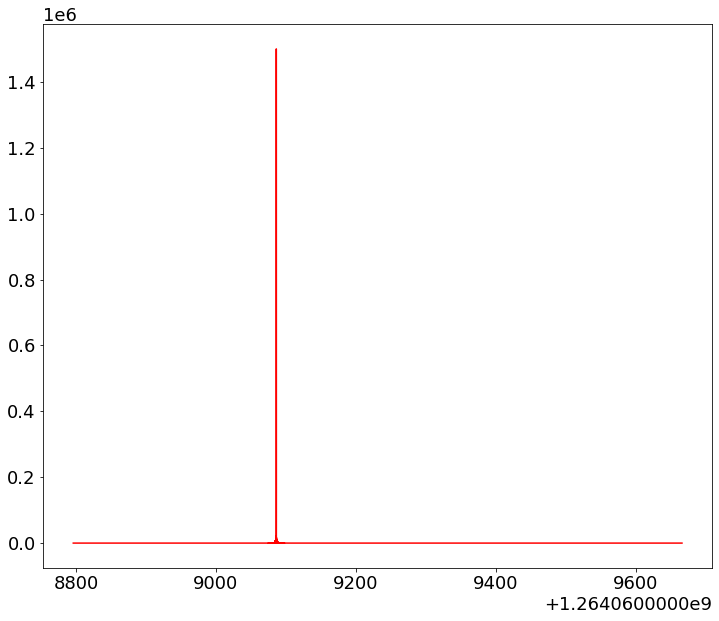

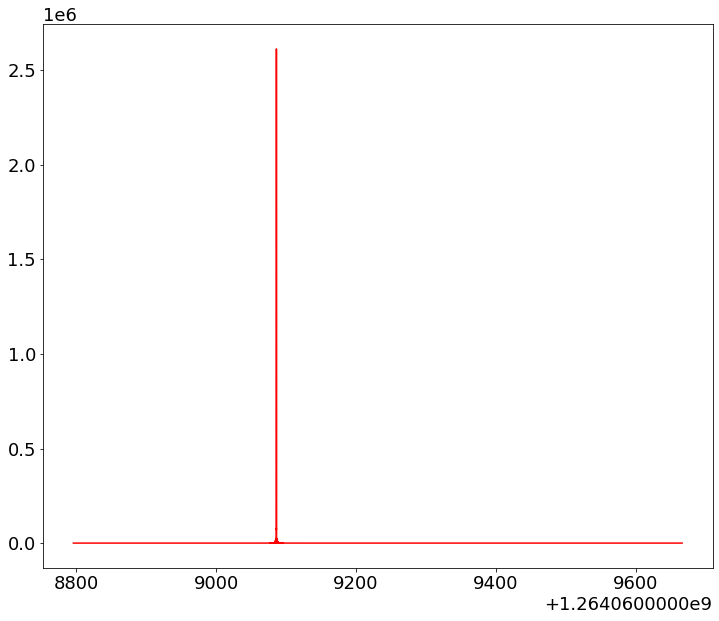

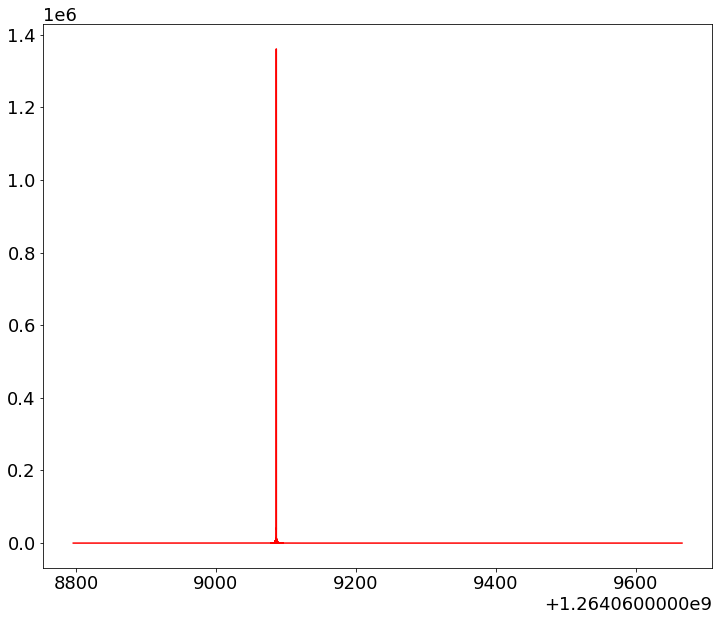

In [15]:
ra_dec_builder(ra_n, dec_n, N)

In [17]:
cd dirs_folder/

/Users/rickwilde/Desktop/summer_research/git/other_repos/ra_dec_time_bash /dirs_folder


In [19]:
os.listdir()

['.DS_Store', 'a', 'b']

In [20]:
cd ..

/Users/rickwilde/Desktop/summer_research/git/other_repos/ra_dec_time_bash 


In [21]:
cd indiv_timekey_folder/H1_keys/

/Users/rickwilde/Desktop/summer_research/git/other_repos/ra_dec_time_bash /indiv_timekey_folder/H1_keys


In [22]:
os.listdir()

['.DS_Store']

In [23]:
cd ..

/Users/rickwilde/Desktop/summer_research/git/other_repos/ra_dec_time_bash /indiv_timekey_folder


In [24]:
ls

H1_keys/ L1_keys/ V1_keys/


In [25]:
os.listdir("H1_keys/")

['.DS_Store']

'/Users/rickwilde/Desktop/summer_research/git/other_repos/ra_dec_time_bash /indiv_timekey_folder'

In [38]:
import time
def monitor(directory, dir_length):

    while True: 
        results = os.listdir(directory)
        time.sleep(1)
        print(len(results))
        print(dir_length)
        if len(results) == (dir_length)+1:
            print("in!")
            break

In [39]:
monitor("H1_keys", 0)

1
0
in!
